**LOADING DATASET**

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
df=pd.read_csv(r"/content/drive/MyDrive/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Description of the Dataset**

**Description**

* **Longitude**: Shows how far west the house is located
* **Latitude**: Shows how far north the house is located
* **Housing Median Age**: Average age of houses in an area (lower value means newer houses)
* **Total Rooms**: Total number of rooms in the area
* **Total Bedrooms**: Total number of bedrooms in the area
* **Population**: Total number of people living in the area
* **Households**: Total number of families or homes in the area
* **Median Income**: Average household income of the area (in tens of thousands of dollars)
* **Median House Value**: Average price of houses in the area (in dollars)
* **Ocean Proximity**: How close the houses are to the ocean or sea.



 Here, First we will check if there is requirement of data cleaning or not

In [3]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


**Data Cleaning**

In [4]:
df.shape

(20640, 10)

After checking for **null** **values**, we found that there are some null values in the **total bedrooms** column, so we will replace those null values with the **median**.

In [5]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median(),inplace=True)

/tmp/ipython-input-1599158251.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(),inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Our data has been cleaned now, will see the further process. But First, let's reset the index.


In [7]:
df=df.reset_index(drop=True)

**EDA**(Exploratory Data Analysis)

First,we will analyze our **Target** **Variable**.

In [8]:
df["median_house_value"].describe()


,median_house_value
count,20640.000000
mean,206855.816909
std,115395.615874
min,14999.000000
25%,119600.000000
50%,179700.000000
75%,264725.000000
max,500001.000000


The output shows the **statistical** summary of house prices in the dataset.
There are **20,640** records with no missing values. The **mean** house value **(206,855**) is higher than the **median** (**179,700**), which indicates that the data is right-skewed due to some high-priced houses. The high **standard** **deviation** (**115,395**) shows large variation in house prices. The **minimum** value is **14,999**, while the **maximum** value is **500,001**, which suggests that the target variable is capped at the upper limit. **Overall**, the data shows wide price variation with skewness and capped high values.

In [9]:
df.groupby("housing_median_age")["median_house_value"].mean().head(10)


,median_house_value
housing_median_age,
1.0,144300.000000
2.0,224475.913793
3.0,235643.580645
4.0,229235.136126
5.0,208417.655738
6.0,203794.393750
7.0,193296.034286
8.0,194414.582524
9.0,186672.702439


This output shows the **average** (**mean**) house value for each housing median age.
For example, houses with a **median** age of **1** **year** have an **average** **price** of **144,300**, while houses with a **median** age of **3** **years** have a **higher** **average** value of around **235,643**. The result indicates that house value does not increase linearly with age; instead, prices fluctuate with housing age. This suggests that housing age alone is not a strong predictor of house value and other factors like location and income also play an important role.

In [10]:
df.groupby("total_rooms")["median_house_value"].mean().head()


,median_house_value
total_rooms,
2.0,137500.0
6.0,55000.0
8.0,500001.0
11.0,162500.0
12.0,67500.0


This analysis shows the average median house value for different values of total rooms.
We can see that house prices change with the number of rooms, but the pattern is not consistent.
Some houses with fewer rooms have high prices, while some with more rooms have lower prices.
This means total_rooms alone does not strongly determine house price.
Other factors like location, median income, and population also affect the house value.

In [11]:
df.groupby("ocean_proximity")["median_house_value"].mean().sort_values(ascending=False)


,median_house_value
ocean_proximity,
ISLAND,380440.000000
NEAR BAY,259212.311790
NEAR OCEAN,249433.977427
<1H OCEAN,240084.285464
INLAND,124805.392001


This result shows the average median house value for different ocean proximity categories.
Houses located on ISLAND have the highest average price, followed by houses near the bay and near the ocean.
Houses that are INLAND have the lowest average house value.

This clearly shows that location and distance from the ocean strongly affect house prices.
So, ocean_proximity is a very important feature for predicting house prices in this dataset.

In [12]:
df.groupby("population")["median_house_value"].mean().head()

,median_house_value
population,
3.0,350000.0
5.0,275000.0
6.0,137500.0
8.0,191250.0
9.0,63750.0


This result shows the average median house value for different population counts.
Each value of population represents how many people live in that area, and the mean shows the average house price there.
We can see that house prices do not increase or decrease consistently with population.
Some low-population areas have high house prices, while others have lower prices.

In [13]:
df.groupby("households")["median_house_value"].mean().head()

,median_house_value
households,
1.0,500001.000000
2.0,118333.333333
3.0,181875.000000
4.0,406250.250000
5.0,210000.142857


From the result, we can see that areas with fewer households generally have higher house prices, while areas with more households tend to have lower average prices.
This indicates that less crowded areas are more expensive, whereas high-density areas are relatively cheaper.

In [14]:
df.groupby("latitude")["median_house_value"].mean().head()

,median_house_value
latitude,
32.54,67500.000000
32.55,115466.666667
32.56,150600.000000
32.57,131327.777778
32.58,138088.461538


From the result, we can see that house prices change with latitude.
Nearby latitude values have similar house prices, which shows that geographical location affects house value.
This means latitude is an important location-based feature.
It helps the model understand regional price patterns.

Now, We will check **value** **counts** for each column.

In [15]:
df["ocean_proximity"].value_counts()



,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Ocean proximity shows strong imbalance, with inland and <1H ocean dominating the dataset

In [16]:
df["housing_median_age"].value_counts().head(10)


,count
housing_median_age,
52.0,1273
36.0,862
35.0,824
16.0,771
17.0,698
34.0,689
26.0,619
33.0,615
18.0,570


Housing median age is round off at 52, which introduces a ceiling effect

In [17]:
df["households"].value_counts().head()

,count
households,
306.0,57
335.0,56
386.0,56
282.0,55
429.0,54


**EDA**(Plots), **Graphical** **visualizations** give us much stronger justification and insights.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

**Median** **House** **Value**

**use**:To show target variable skewness & price capping.

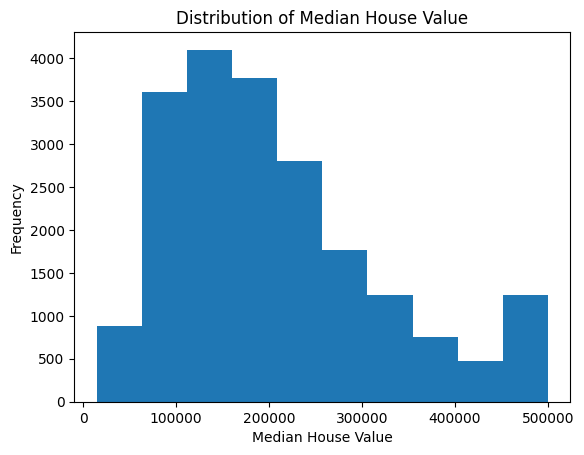

In [19]:
plt.figure()
plt.hist(df["median_house_value"])
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")
plt.show()

The **histogram** shows that most houses have **median** **house** **values** between **50,000** and **300,000**.
The **highest** **frequency** of houses lies around **100**,**000** to **200,000**, which means most houses are priced in this range.
As the **median** **house** **value** **increases** **above** **300**,**000**, the number of houses gradually decreases, showing that high-priced houses are fewer in the dataset.
There is also a **clear** **spike** near **500,000**, which indicates a **price** **cap** in the data.
This means **house** **values** **above** **500**,**000** were limited or capped, so many records have the same **maximum** value.
**Overall**, the distribution is **right**-**skewed**.

**Median** **Income** **vs** **House** **Value**

**use**:To justify feature distribution.


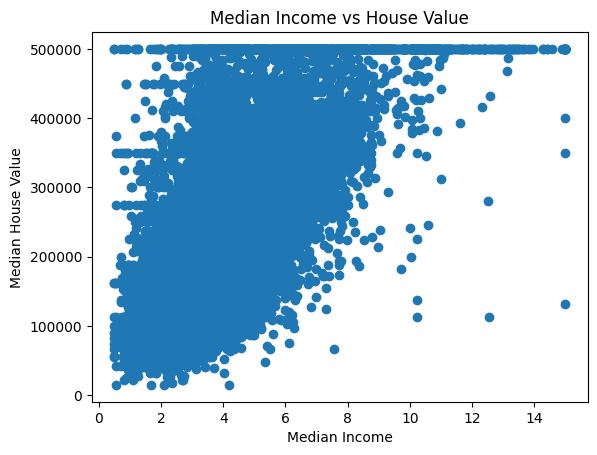

In [20]:
plt.figure()
plt.scatter(df["median_income"], df["median_house_value"])
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs House Value")
plt.show()

There is a **clear** **positive** **relationship** between median income and house value.
As **median** **income** **increases** from around **1** to **6**, the **median** **house** **value** also **increases** from nearly **50**,**000** to around **300**,**000**.
When **median** **income** is **above** **6**, many house values reach close to **500**,**000**, showing a **price** **cap** in the dataset.
This creates a **horizontal** line near **500**,**000** in the scatter plot.
This means **median** **income** is one of the **strongest** predictors of **house** **price**.
Higher income areas generally have **higher** **house** **values**, but the **upper** **limit** (cap) affects the data distribution.

**Ocean Proximity** **vs** **House** **Value**

**Use**:To explain strong positive relationship.

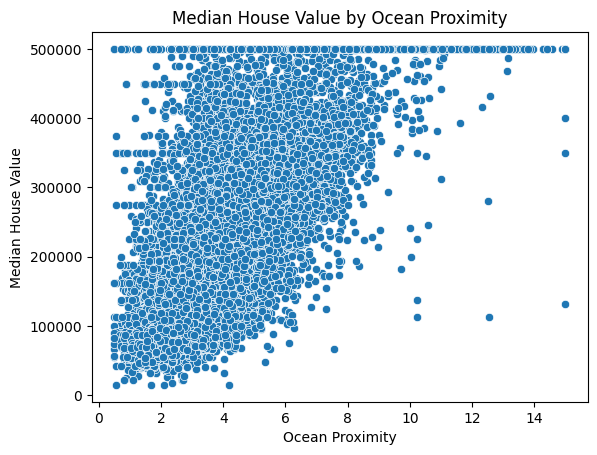

In [21]:
plt.figure()
sns.scatterplot(x="median_income", y="median_house_value", data=df)
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.title("Median House Value by Ocean Proximity")
plt.show()

We can clearly see that **house** **prices** vary by **ocean** **proximity**.
**INLAND** areas mostly have lower house values, generally around **50**,**000** to **200**,**000**.
Houses <**1H** **OCEAN** and **NEAR** **OCEAN** mostly fall between **150**,**000** to **350**,**000**.
**NEAR** **BAY** and **ISLAND** categories show **higher** house values, with many points close to **400**,**000–500**,**000**.
There is also a **price** **cap** near **500**,**000**, where many values are clustered.
This shows that houses closer to the ocean are more expensive, and ocean proximity strongly influences house prices.

**Housing** **Median** **Age**

**use**:To show outliers & saturation

<function matplotlib.pyplot.show(close=None, block=None)>

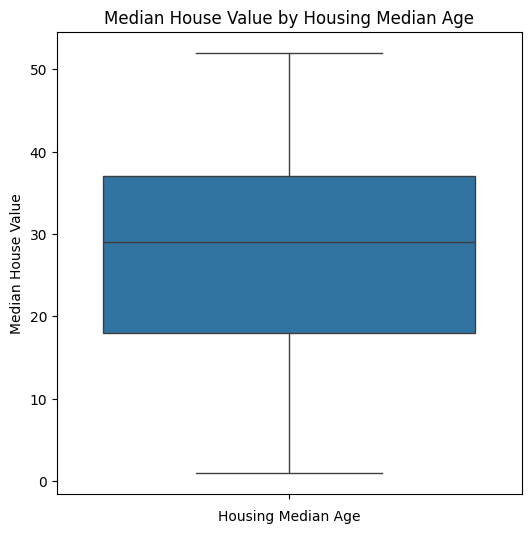

In [22]:
plt.figure(figsize=(6,6))
sns.boxplot(df["housing_median_age"].dropna())
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.title("Median House Value by Housing Median Age")
plt.show

The box plot of housing median age shows no significant outliers, as all values lie within the whisker range, indicating a well-distributed feature without extreme anomalies.

**Ocean** **Proximity**

**use**:To justify about encoding, It is categorical with no natural order, OneHotEncoding is used.

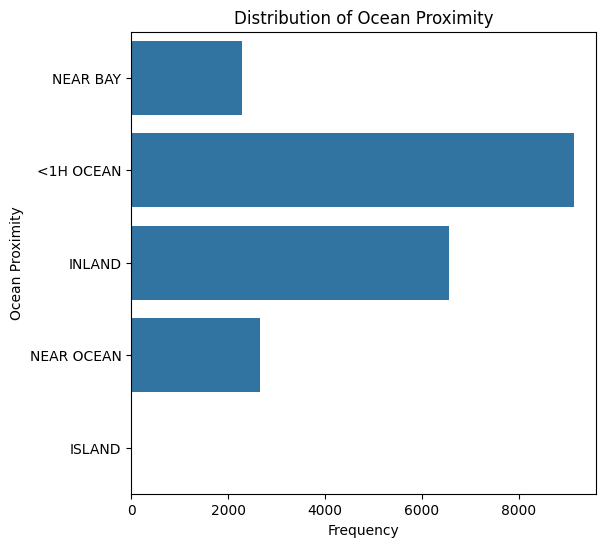

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(df["ocean_proximity"])
plt.xlabel("Frequency")
plt.ylabel("Ocean Proximity")
plt.title("Distribution of Ocean Proximity")
plt.show()

The count plot shows the number of houses (**frequency**) in each **ocean** **proximity** category.
Most houses in the dataset are located **less** **than** **1** **hour** **from** the **ocean**, followed by **inland** **areas**.
Very few houses are located on islands, making it a **rare** **category**.
This shows that the dataset is **not** **evenly** **distributed** **across** **locations**.
Categories like <**1H** **OCEAN** and **INLAND** dominate the data, while **ISLAND** has very few samples.

**Population**

**use**:To explain skewed feature and scaling.

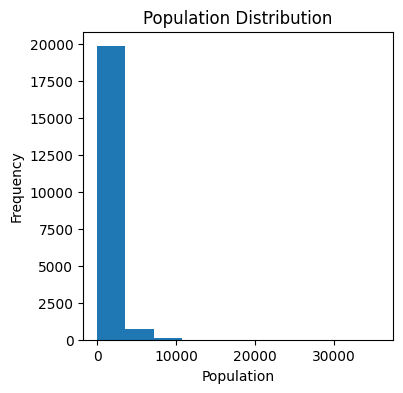

In [24]:
plt.figure(figsize=(4,4))
plt.hist(df["population"])
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.title("Population Distribution")
plt.show()

The histogram shows the distribution of **population** across different areas.
Most areas have a **low** **population**, mainly between **0** **and** **1**,**500** people.
The **highest** **frequency** is concentrated **below** **1**,**000** population.
As population increases **above** **2**,**000**, the number of areas **drops** **sharply**, and very few areas have population above **5**,**000**.

**Longitude** **vs** **Latitude**

**use**:To show location importance.

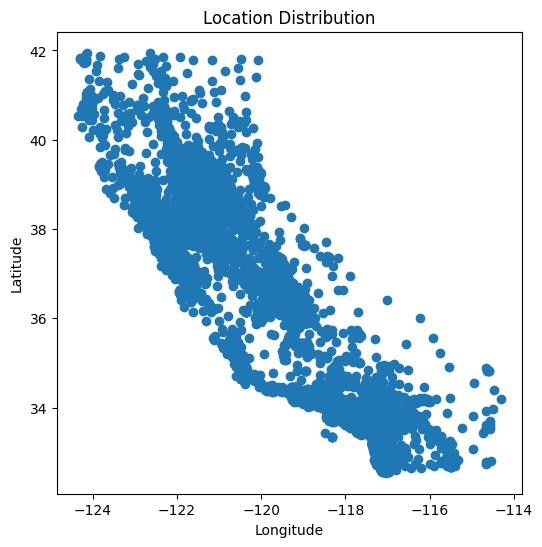

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(x="longitude", y="latitude", data=df)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Location Distribution")
plt.show()

The scatter plot shows the **geographical** **distribution** of houses using **longitude** and **latitude**.
Most points are clustered between **longitude** **−124** to **−114** and **latitude** **32** to **42**, which matches the **California** region.
There are **dense** **clusters** around:

**Latitude** ~**34–38** (Southern & Central California)

**Longitude** ~**−122** to **−118** (coastal and urban areas)
The plot clearly shows that houses are **not** **randomly** **distributed** but follow a **specific** **geographic** **pattern**.
This indicates that **location** **plays** a **major** **role** in housing data and strongly affects **house** **prices**.


**Encoding**

We have only one Categorical column (**Ocean** **Proximity**), on which we will apply **OneHotEncoding**.

In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [27]:
q=encoder.fit_transform(df[["ocean_proximity"]]).toarray()
q

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

The encoding is done and it is now fitted back into the original dataset.

In [28]:
encoded_df=pd.DataFrame(q,columns=encoder.get_feature_names_out())
df=pd.concat([df,encoded_df],axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0


Now, We will drop the categorical column

In [29]:
df=df.drop(columns=["ocean_proximity"])

From here, We will separate Independent and Dependent variables

In [30]:
X=df.drop("median_house_value",axis=1)
y=df["median_house_value"]

**Scaling**: So that all features are brought to the same scale

In [31]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [32]:
X=scale.fit_transform(X)

Splitting Dataset into training and testing data

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Choosing** **the** **best** **model**



**1. Linear** **Regression**

In [34]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [35]:
regressor.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred=regressor.predict(X_test)

In [37]:
y_pred

array([216660.24431602, 287580.09894729, 179529.14050791, ...,
        89223.63901073, 255332.57193783, 213353.6347152 ])

In [38]:
y_test

,median_house_value
14740,136900.0
10101,241300.0
20566,200700.0
2670,72500.0
15709,460000.0
...,...
6655,169500.0
3505,204600.0
1919,128600.0
1450,259500.0


Will calculate its metrics

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [40]:
print(mean_squared_error(y_test,y_pred))


4719192088.227013


In [41]:
print(mean_absolute_error(y_test,y_pred))

49707.42799359942


In [42]:
print(r2_score(y_test,y_pred))

0.6380862497737064


**2. Decision** **Tree** **Regressor**

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=10)

In [50]:
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
print(r2_score(y_test,y_pred))

0.7159322835511908


**3. Random** **Forest** **Regressor**

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=150)


In [54]:
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print(r2_score(y_test,y_pred))

0.8251136261622191


Here, We can see that the **Random** **Forest** **Regressor** is working well for our model selection.

Now we will take input from the user and generate predictions.


In [47]:
import numpy as np

In [55]:
longitude=float(input("Longitude: "))
latitude=float(input("Latitude: "))
housing_median_age=float(input("Housing median age: "))
total_rooms=float(input("Total rooms: "))
total_bedrooms=float(input("Total bedrooms: "))
population=float(input("Population: "))
households=float(input("Households: "))
median_income=float(input("Median income: "))
ocean=input("Ocean proximity (<1H OCEAN / INLAND / NEAR BAY / NEAR OCEAN / ISLAND): ")

ocean_proximity_1H_OCEAN=0
ocean_proximity_INLAND=0
ocean_proximity_NEAR_BAY=0
ocean_proximity_NEAR_OCEAN=0
ocean_proximity_ISLAND=0

if ocean=="<1H OCEAN":
  ocean_proximity_1H_OCEAN=1
  ocean_proximity_INLAND=0
  ocean_proximity_NEAR_BAY=0
  ocean_proximity_NEAR_OCEAN=0
  ocean_proximity_ISLAND=0
elif ocean=="INLAND":
  ocean_proximity_1H_OCEAN=0
  ocean_proximity_INLAND=1
  ocean_proximity_NEAR_BAY=0
  ocean_proximity_NEAR_OCEAN=0
  ocean_proximity_ISLAND=0
elif ocean=="NEAR BAY":
  ocean_proximity_1H_OCEAN=0
  ocean_proximity_INLAND=0
  ocean_proximity_NEAR_BAY=1
  ocean_proximity_NEAR_OCEAN=0
  ocean_proximity_ISLAND=0

else:
  ocean_proximity_1H_OCEAN=0
  ocean_proximity_INLAND=0
  ocean_proximity_NEAR_BAY=0
  ocean_proximity_NEAR_OCEAN=1

Longitude: 122.78
Latitude: 38.23
Housing median age: 52.34
Total rooms: 919.0
Total bedrooms: 665.0
Population: 1206.0
Households: 714.0
Median income: 2.918
Ocean proximity (<1H OCEAN / INLAND / NEAR BAY / NEAR OCEAN / ISLAND): INLAND


In [56]:
X=np.array([longitude, latitude, housing_median_age,total_rooms, total_bedrooms, population, households, median_income,ocean_proximity_1H_OCEAN, ocean_proximity_INLAND, ocean_proximity_NEAR_BAY, ocean_proximity_NEAR_OCEAN, ocean_proximity_ISLAND])
X=X.reshape(1,-1)
X=scale.transform(X)
pred=rfr.predict(X)
print(pred)


[108628.66666667]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
